# <FONT SIZE=5 COLOR="blue"> 1. Selección de Características </FONT>

La selección de características (feature selection) es el proceso de identificar y conservar únicamente las variables más relevantes para un modelo de machine learning, eliminando aquellas que son:

- Redundantes

- Irrelevantes

- Ruidosas

Lo anterior nos puede ayudar a mejorar el rendimiento y la generalización del modelo, reducir el sobreajuste o acelerar el entrenamiento.

Algunos de los métodos más usados

**Filtros**: Se seleccionan variable antes del modelo usandp herramientas estadísticas.

- **Chi-Cuadrado**: usado para variables categóricas

- **Coeficiente de Correlación**: para variable numéricas

- **ANOVA**: para hacer comparación entre medias de grupos

- **Mutual information**

**Wrappers**: Usan el modelo para evaluar diferentes configuraciones de varaibles

- **Forwars selection**. El modelo empieza sin variables y se van agregando

- **Barkwars selection:** El modelo empieza con todas las variables y se van quitando

- **RFE:** Recursive Feature Elimination. Va eliminando las variables menos importantes del modelo. (con árboles o SVM)

**Embedded**: La selección se hace durante el entrenamiento del modelo

- **Regresión Lasso**

- **Árboles de Decisión, Randon Forest, etc**



In [1]:
# librerías clásicas
import pandas                  as pd
import numpy                   as np

# librerías de gráficas
import seaborn                 as sns
import matplotlib.pyplot       as plt

# preprocesado
from sklearn.preprocessing     import StandardScaler
from sklearn.model_selection   import train_test_split

# modelos
from sklearn.linear_model      import LogisticRegression
from sklearn.tree              import DecisionTreeClassifier

# métricas
from sklearn.metrics           import ConfusionMatrixDisplay
from sklearn.metrics           import confusion_matrix, accuracy_score, recall_score, f1_score

# curva ROC
from sklearn.metrics           import roc_auc_score
from sklearn.metrics           import roc_curve

# datos
from sklearn.datasets          import load_breast_cancer

Veamos un ejemplo rápido

In [ ]:
# 1. Cargar los datos
datos = load_breast_cancer()
datos

In [ ]:
pd.DataFrame(datos.data, columns=datos.feature_names)

In [ ]:
datos.target

In [5]:
# 2. Definimos las variables
X = pd.DataFrame(datos.data, columns=datos.feature_names)
y = datos.target

# 3. Dividir entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# 4. Entrenar árbol
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
tree.feature_importances_

array([0.        , 0.02288528, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70583856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01356259, 0.00200417,
       0.        , 0.00715165, 0.01716396, 0.        , 0.        ,
       0.07018674, 0.11406234, 0.        , 0.0366527 , 0.01049202,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [7]:
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
importances.head()

,0
mean concave points,0.705839
worst texture,0.114062
worst radius,0.070187
worst area,0.036653
mean texture,0.022885


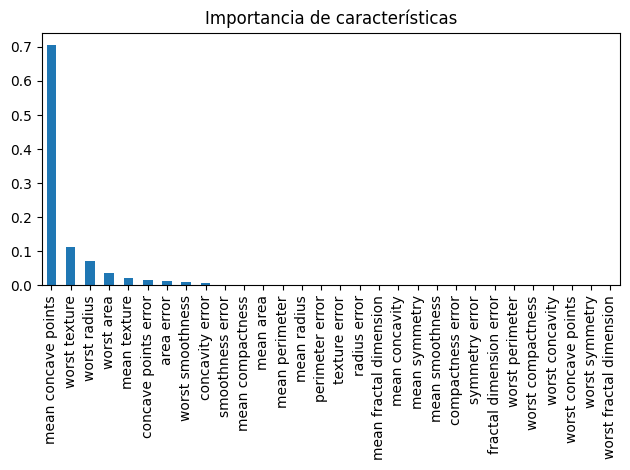

In [8]:
# 5. Visualización
importances.plot(kind='bar',
                 title='Importancia de características')
plt.tight_layout()
plt.show()

¿Pero qué es esto?

La importancia de una variable es una medida que indica cuánto contribuye esa variable a la predicción del modelo.

En el caso de árboles de decisión, esto se interpreta así:

- Cada vez que una variable se usa para dividir un nodo, se mide cuánto disminuye la impureza (por ejemplo, Gini o entropía).

- Se suman todas esas mejoras a lo largo del árbol para cada variable.

- Se normaliza el total para que las importancias sumen 1.

En otras palabras:

**Mayor importancia** es poque es más útil para reducir incertidumbre en las decisiones del modelo.



# <FONT SIZE=5 COLOR="blue"> 2. Sobre la Matriz de Confusión </FONT>



In [9]:
# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

# Escalar los datos (recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modelo de regresión logística**

Matriz de confusión - Entrenamiento:
 [[140   4]
 [  2 252]]
Matriz de confusión - Prueba:
 [[ 67   1]
 [  0 103]]


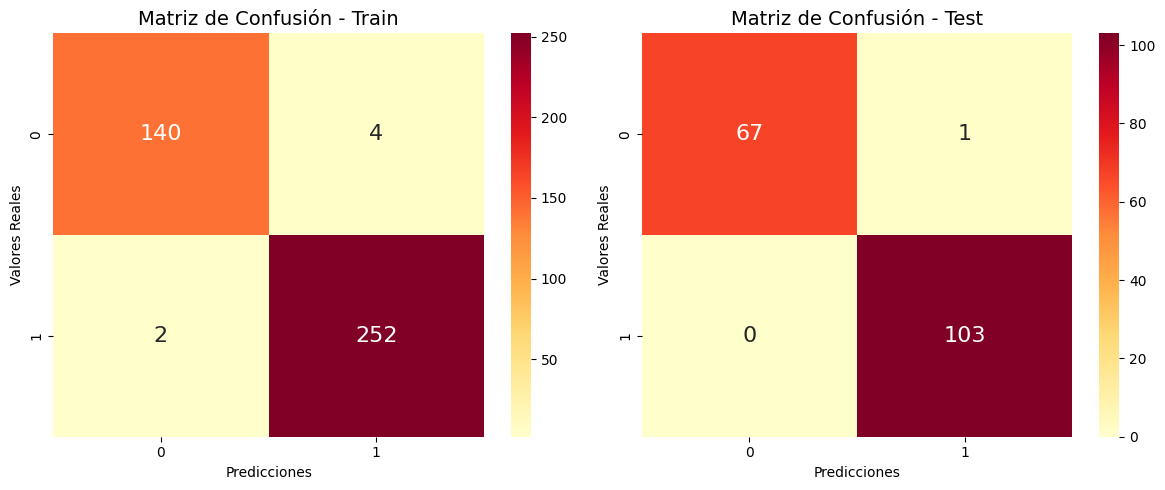

In [10]:
# Entrenar el modelo regresión logística
model_log = LogisticRegression( random_state=42)
model_log.fit(X_train_scaled, y_train)

# Hacer las predicciones sobre train y test
y_pred_train = model_log.predict(X_train_scaled)
y_pred_test = model_log.predict(X_test_scaled)

# Calcular matrices de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Mostrar matrices
print("Matriz de confusión - Entrenamiento:\n", cm_train)
print("Matriz de confusión - Prueba:\n", cm_test)

# Graficar las dos matrices train y test
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pd.DataFrame(cm_train),
            annot=True,
            fmt='g',
            cmap='YlOrRd',
            annot_kws={'size':16},
            ax=axes[0])
axes[0].set_title('Matriz de Confusión - Train', fontsize=14)
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

sns.heatmap(pd.DataFrame(cm_test),
            annot=True,
            fmt='g',
            cmap='YlOrRd',
            annot_kws={'size':16},
            ax=axes[1])
axes[1].set_title('Matriz de Confusión - Test', fontsize=14)
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()

In [12]:
# Calcular métricas
metricas = {
    'accuracy': [
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ],
    'recall': [
        recall_score(y_train, y_pred_train),
        recall_score(y_test, y_pred_test)
    ],

    'f1_score': [
        f1_score(y_train, y_pred_train),
        f1_score(y_test, y_pred_test)
    ]
}

# 8. Mostrar en DataFrame
df_metricas = pd.DataFrame(metricas, index=['Train', 'Test'])
print(df_metricas.round(4))

       accuracy  recall  f1_score
Train    0.9849  0.9921    0.9882
Test     0.9942  1.0000    0.9952


**Modelo de Árboles de Decisión**

Matriz de confusión - Entrenamiento:
 [[144   0]
 [  0 254]]
Matriz de confusión - Prueba:
 [[ 64   4]
 [  2 101]]


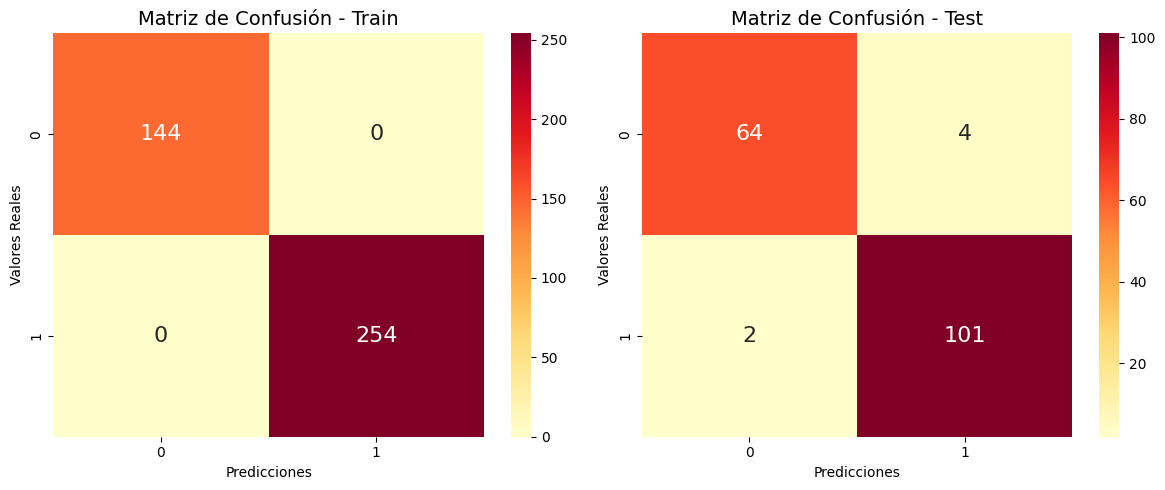

In [13]:
# Entrenar el modelo árboles de decisión
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_scaled, y_train)

# Hacer las predicciones sobre train y test
y_pred_train = model_tree.predict(X_train_scaled)
y_pred_test = model_tree.predict(X_test_scaled)

# Calcular matrices de confusión
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Mostrar matrices
print("Matriz de confusión - Entrenamiento:\n", cm_train)
print("Matriz de confusión - Prueba:\n", cm_test)

# Graficar las dos matrices train y test
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pd.DataFrame(cm_train),
            annot=True,
            fmt='g',
            cmap='YlOrRd',
            annot_kws={'size':16},
            ax=axes[0])
axes[0].set_title('Matriz de Confusión - Train', fontsize=14)
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

sns.heatmap(pd.DataFrame(cm_test),
            annot=True,
            fmt='g',
            cmap='YlOrRd',
            annot_kws={'size':16},
            ax=axes[1])
axes[1].set_title('Matriz de Confusión - Test', fontsize=14)
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()

In [14]:
# Calcular métricas
metricas = {
    'accuracy': [
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ],
    'recall': [
        recall_score(y_train, y_pred_train),
        recall_score(y_test, y_pred_test)
    ],

    'f1_score': [
        f1_score(y_train, y_pred_train),
        f1_score(y_test, y_pred_test)
    ]
}

# 8. Mostrar en DataFrame
df_metricas = pd.DataFrame(metricas, index=['Train', 'Test'])
print(df_metricas.round(4))

       accuracy  recall  f1_score
Train    1.0000  1.0000    1.0000
Test     0.9649  0.9806    0.9712


# <FONT SIZE=5 COLOR="blue"> 3. Sobre la curva ROC </FONT>

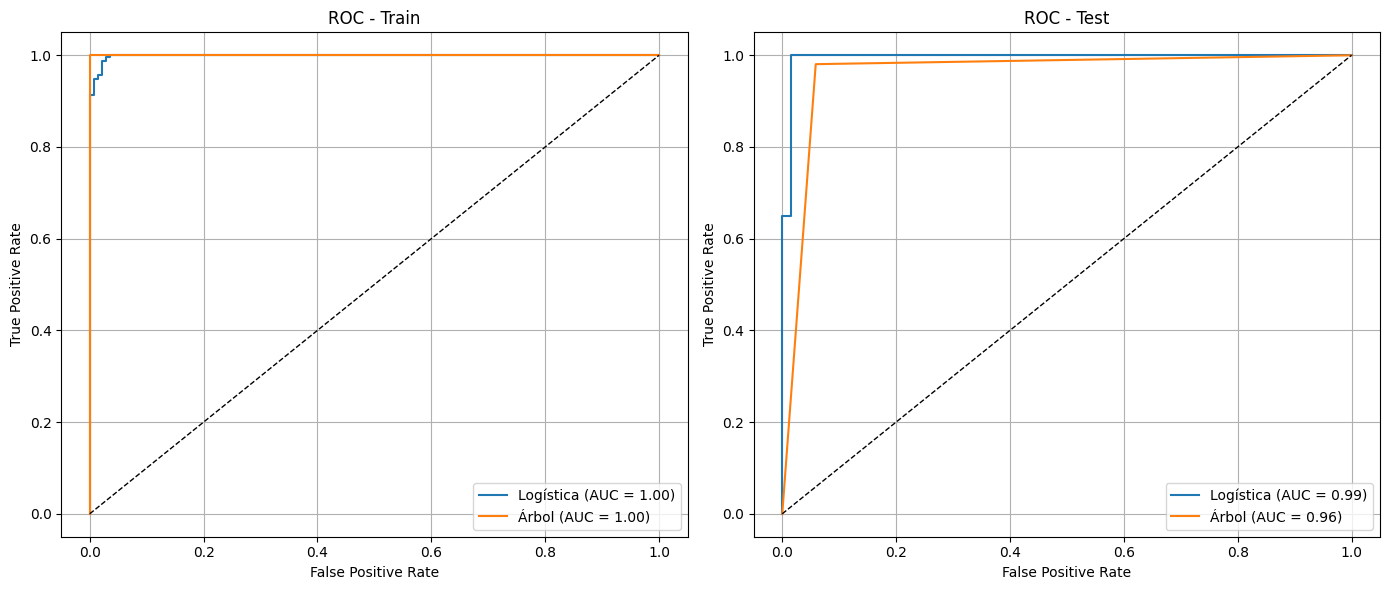

In [15]:
# Entrenamiento
fpr_train_log, tpr_train_log, _ = roc_curve(y_train, model_log.predict_proba(X_train_scaled)[:,1])
fpr_train_tree, tpr_train_tree, _ = roc_curve(y_train, model_tree.predict_proba(X_train_scaled)[:,1])
auc_train_log = roc_auc_score(y_train, model_log.predict_proba(X_train_scaled)[:,1])
auc_train_tree = roc_auc_score(y_train, model_tree.predict_proba(X_train_scaled)[:,1])

# Prueba
fpr_test_log, tpr_test_log, _ = roc_curve(y_test, model_log.predict_proba(X_test_scaled)[:,1])
fpr_test_tree, tpr_test_tree, _ = roc_curve(y_test, model_tree.predict_proba(X_test_scaled)[:,1])
auc_test_log = roc_auc_score(y_test, model_log.predict_proba(X_test_scaled)[:,1])
auc_test_tree = roc_auc_score(y_test, model_tree.predict_proba(X_test_scaled)[:,1])

# Hacer las dos gráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ROC Train
ax[0].plot(fpr_train_log, tpr_train_log, label=f'Logística (AUC = {auc_train_log:.2f})')
ax[0].plot(fpr_train_tree, tpr_train_tree, label=f'Árbol (AUC = {auc_train_tree:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--', lw=1)
ax[0].set_title('ROC - Train')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()
ax[0].grid(True)

# ROC Test
ax[1].plot(fpr_test_log, tpr_test_log, label=f'Logística (AUC = {auc_test_log:.2f})')
ax[1].plot(fpr_test_tree, tpr_test_tree, label=f'Árbol (AUC = {auc_test_tree:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--', lw=1)
ax[1].set_title('ROC - Test')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()